In [7]:
# Be sure run this pip install to run anvil
# Run this chunk, comment it out, and then run whole file
# !pip install anvil-uplink


In [8]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import anvil.server
anvil.server.connect("server_INJ4Z3RT6ZGRGYKLXK7JNACG-2KZP4EKVXPITWNAO")

# to make this notebook's output stable across runs
np.random.seed(42)

def loadSchoolData():
  school = pd.read_csv('school_data.csv')
  return school

school = loadSchoolData()

In [9]:
school.info()
school.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   school                                         1711 non-null   object 
 1   division                                       1711 non-null   object 
 2   school_division                                1711 non-null   object 
 3   latitude                                       1711 non-null   float64
 4   longitude                                      1711 non-null   float64
 5   10_or_more_absences                            1711 non-null   int64  
 6   half_year_enrollment                           1711 non-null   int64  
 7   rate_chronic_absence                           1711 non-null   float64
 8   free_reduced_lunch_eligible                    1695 non-null   float64
 9   eoy_avg_daily_membership                       1710 

,latitude,longitude,10_or_more_absences,half_year_enrollment,rate_chronic_absence,free_reduced_lunch_eligible,eoy_avg_daily_membership,school_level_expenditures_per_pupil_federal,school_level_expenditures_per_pupil_state,division_level_expenditures_per_pupil_federal,...,percent_econ_disadvantaged,teacher_BA,teacher_MA,teacher_PHD,provisional_percent,sol_pass_rate,percent_female_students,percent_male_students,percent_disabled_students,percent_not_disabled_students
count,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1695.000000,1710.000000,1710.000000,1710.000000,1710.000000,...,1682.000000,1706.000000,1706.000000,1706.000000,1690.000000,1711.000000,1697.000000,1697.000000,1684.000000,1693.000000
mean,37.781719,-78.009494,131.358270,667.971946,19.678866,50.921357,678.603175,839.987719,9648.074269,562.091228,...,0.439461,41.246776,54.389801,1.155334,7.348639,66.326865,0.484455,0.515545,0.137466,0.863265
std,0.829078,1.576675,127.596402,480.863589,10.468146,27.673045,471.537765,699.273242,3812.838660,614.120843,...,0.197431,12.354374,13.154792,1.746691,5.574063,15.702754,0.027509,0.027509,0.039068,0.040227
min,36.568221,-83.528753,0.000000,23.000000,0.000000,0.000000,23.530000,0.000000,143.000000,0.000000,...,0.017771,7.000000,14.000000,0.000000,0.000000,7.000000,0.262295,0.340426,0.012251,0.573770
25%,37.040959,-78.809044,55.000000,381.000000,12.010000,29.400000,399.260000,360.000000,7636.500000,175.000000,...,0.287312,32.000000,45.000000,0.000000,3.500000,56.200000,0.469118,0.500000,0.111187,0.841060
50%,37.549741,-77.485896,95.000000,541.000000,18.030000,47.800000,561.315000,630.500000,8866.000000,543.000000,...,0.451775,41.000000,54.000000,0.000000,6.500000,68.000000,0.484615,0.515385,0.134057,0.866126
75%,38.706511,-77.133208,155.000000,773.000000,25.510000,75.350000,787.977500,1184.750000,10761.250000,694.000000,...,0.585999,50.000000,64.000000,2.000000,10.000000,78.250000,0.500000,0.530882,0.159008,0.889093
max,39.269494,-75.357558,1094.000000,4400.000000,91.720000,100.000000,4352.180000,5940.000000,76951.000000,3624.000000,...,1.000000,86.000000,90.000000,20.000000,42.100000,100.000000,0.659574,0.737705,0.426230,1.000000


In [10]:
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

original_school = school.copy()
school_kmeans = original_school.copy()

train_set, test_set = train_test_split(school, test_size=0.2, random_state=42)
school = train_set.copy()

corr_matrix = school.corr(numeric_only=True)
corr_max = corr_matrix["sol_pass_rate"].sort_values(ascending=False)
corr_list = list(corr_max.index)
print(corr_list)


['sol_pass_rate', 'teacher_MA', 'half_year_enrollment', 'eoy_avg_daily_membership', 'percent_not_disabled_students', 'latitude', 'total_expenditures', 'percent_female_students', 'percent_male_students', 'school_level_expenditures_per_pupil_state', 'teacher_PHD', 'percent_disabled_students', 'longitude', 'division_level_expenditures_per_pupil_state', 'teacher_BA', 'percent_out_of_field_inexperienced_teachers', 'percent_inexperienced_teachers', '10_or_more_absences', 'percent_out_of_field_teachers', 'total_per_pupil_expenditures', 'school_level_expenditures_per_pupil_federal', 'division_level_expenditures_per_pupil_federal', 'provisional_percent', 'rate_chronic_absence', 'percent_econ_disadvantaged', 'free_reduced_lunch_eligible']


/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


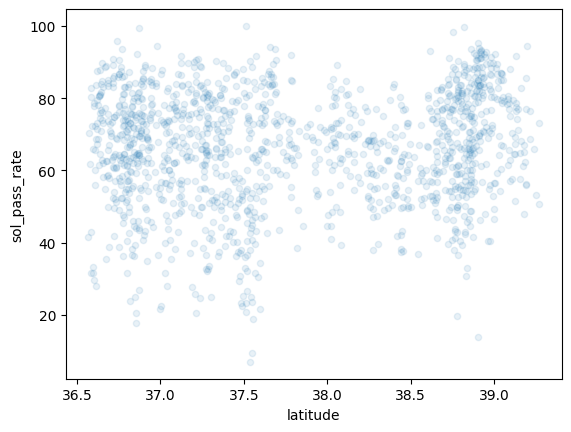

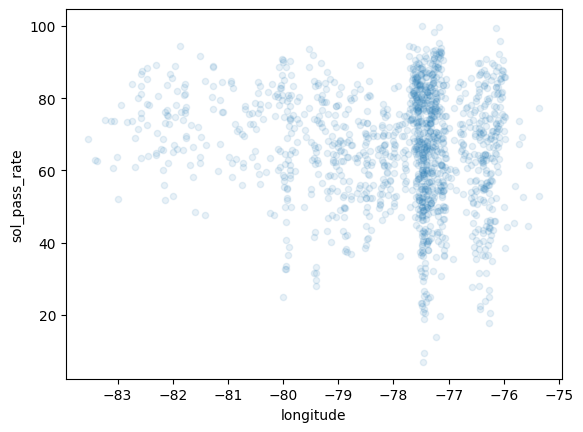

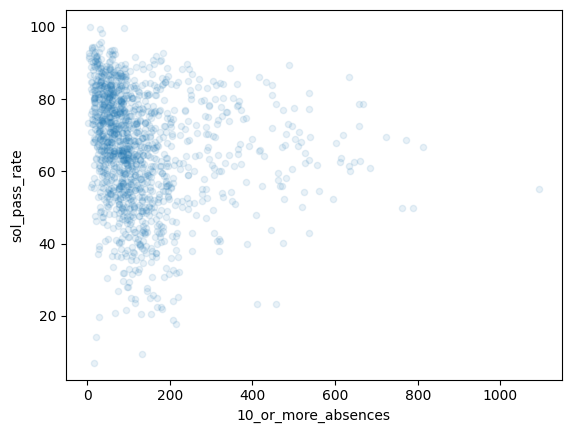

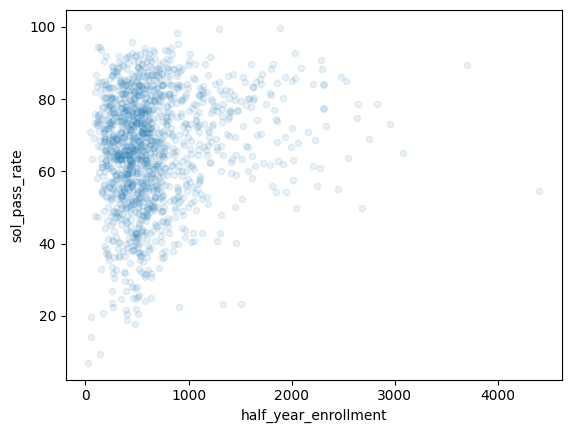

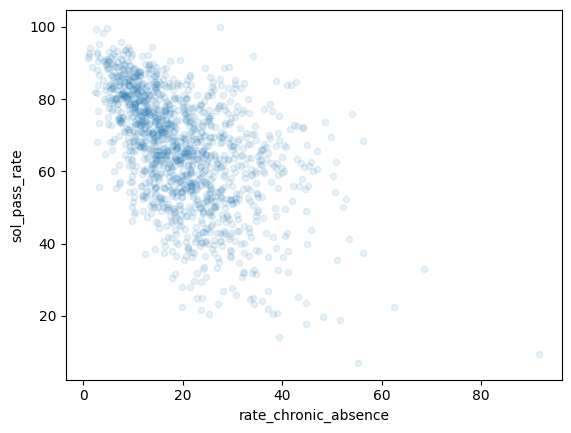

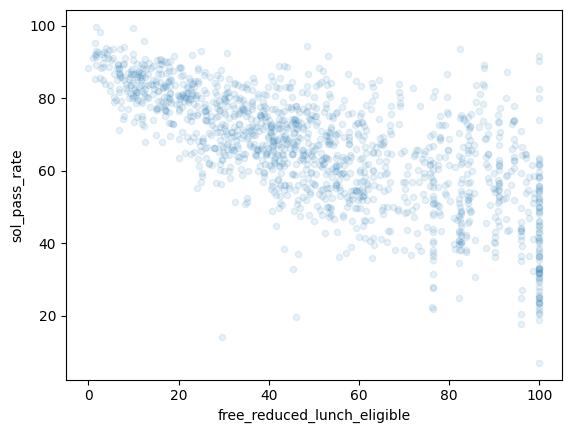

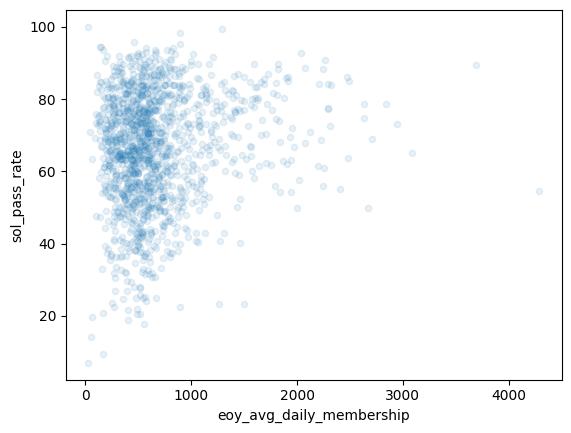

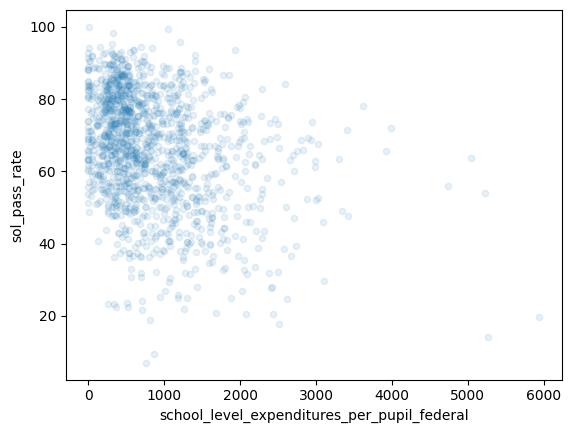

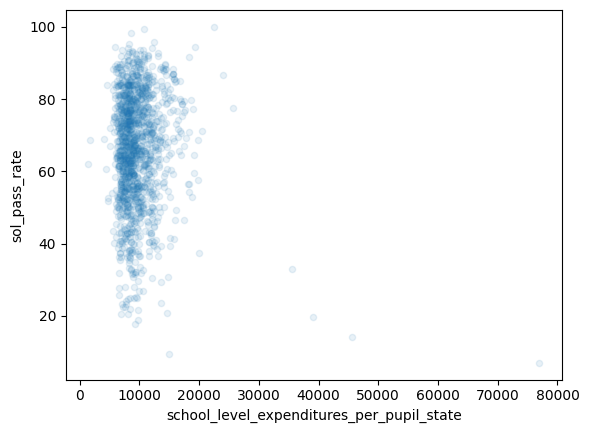

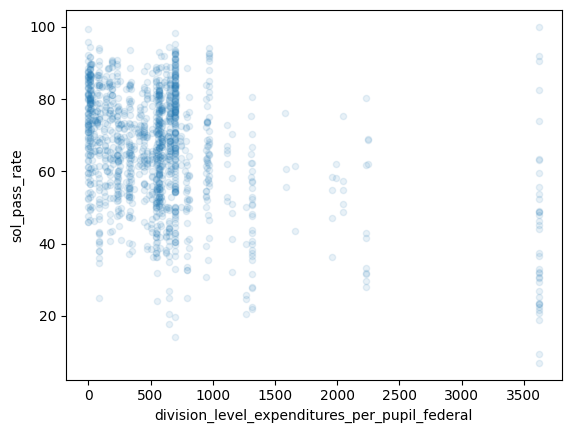

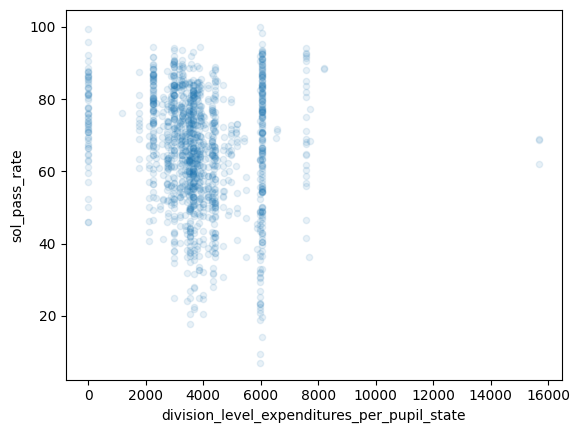

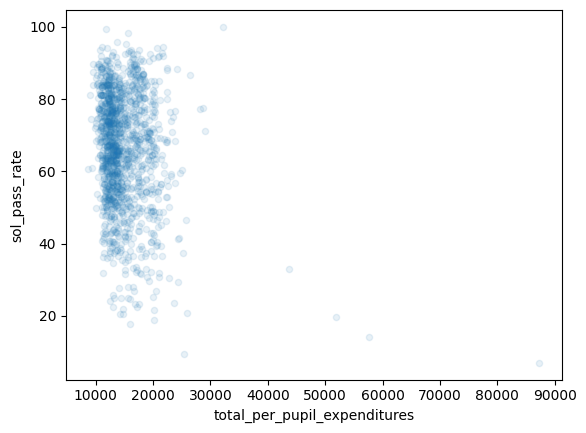

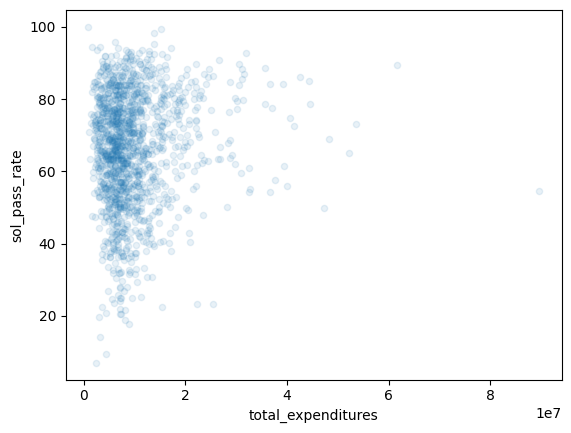

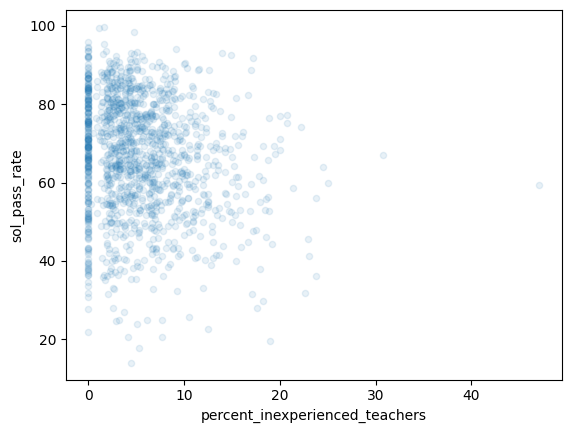

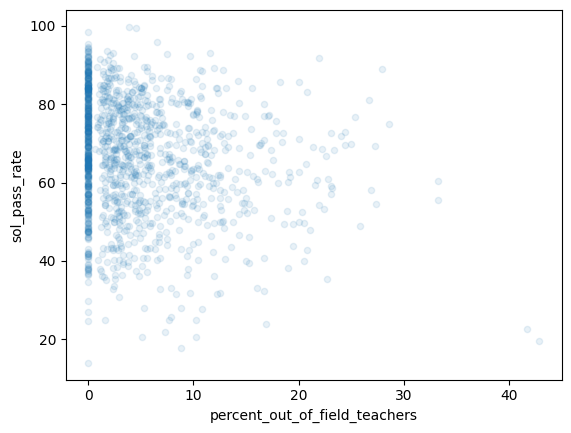

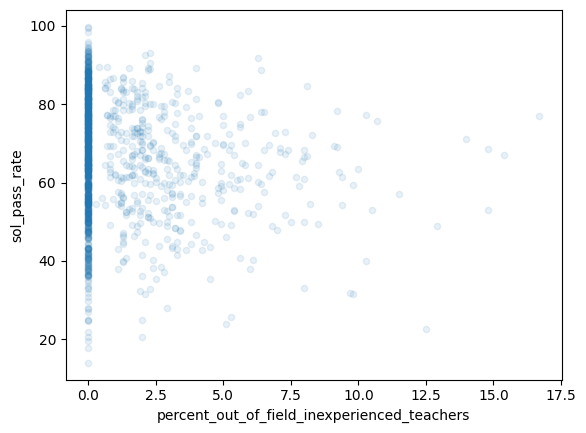

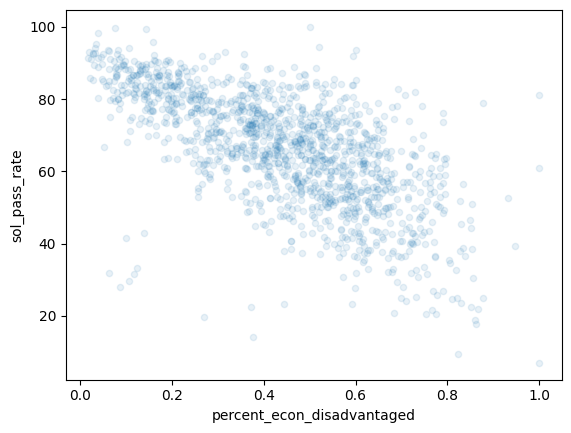

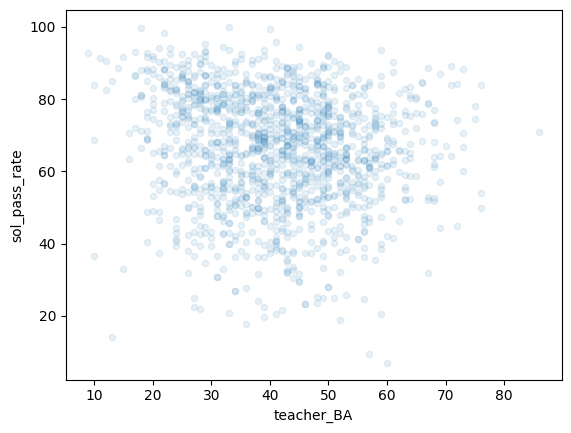

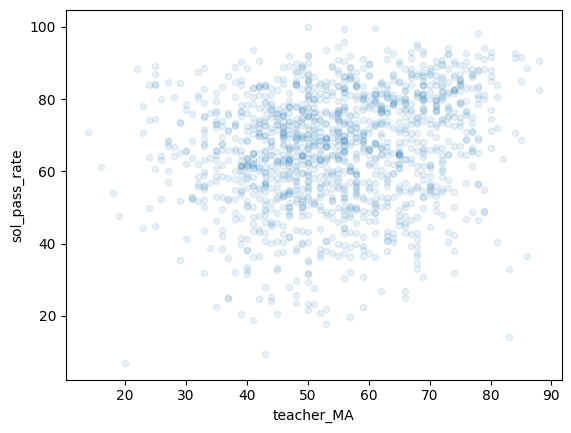

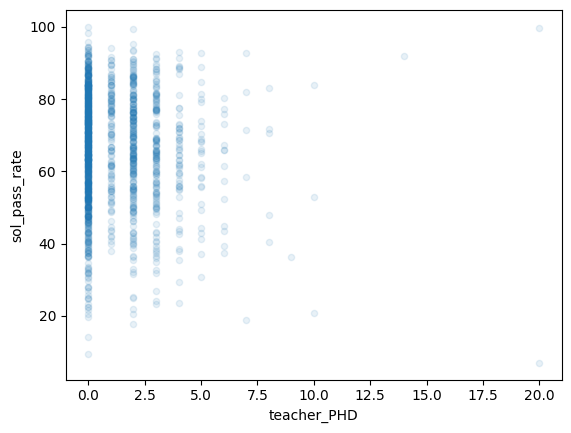

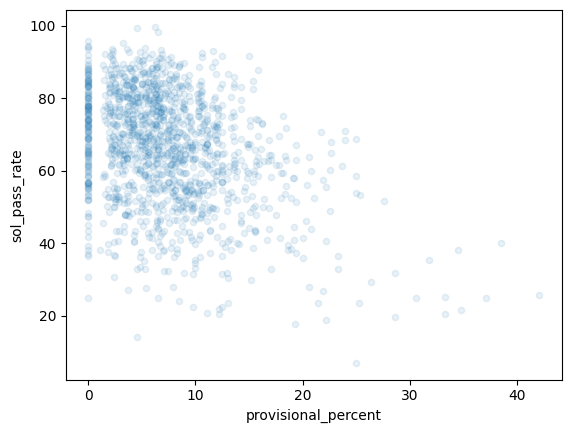

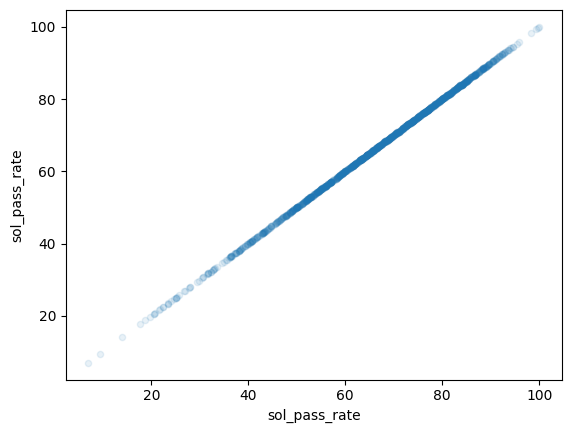

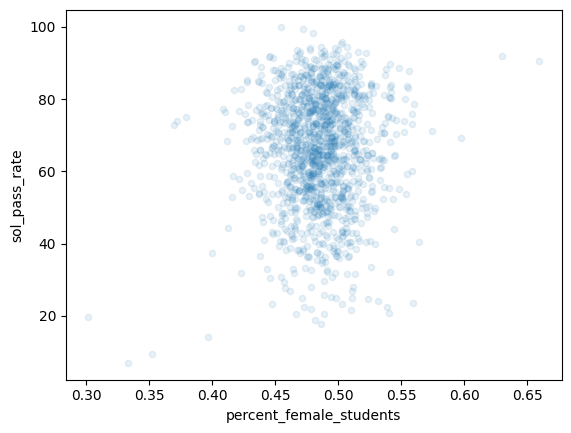

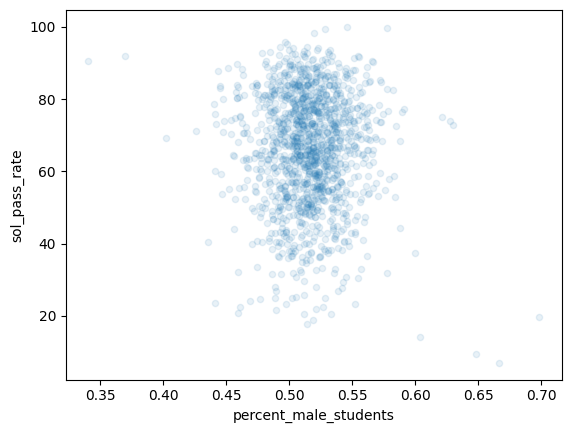

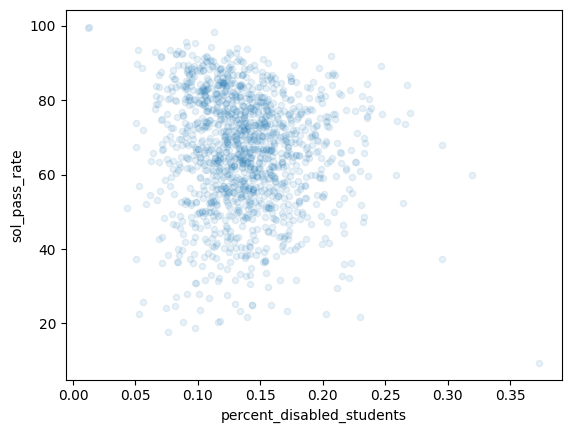

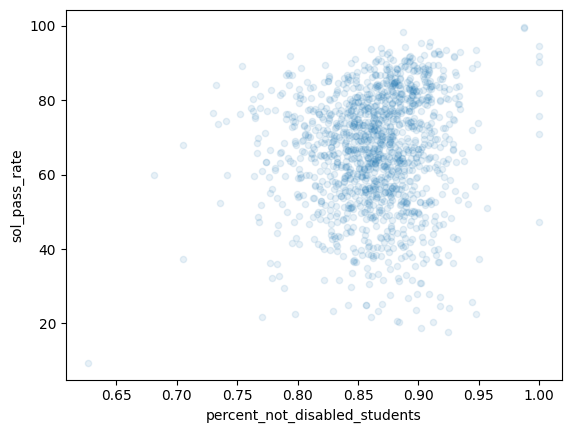

In [11]:
for attribute in list(school.select_dtypes(include='number').columns):
  school.plot(kind="scatter", x=attribute, y="sol_pass_rate", alpha=0.1)

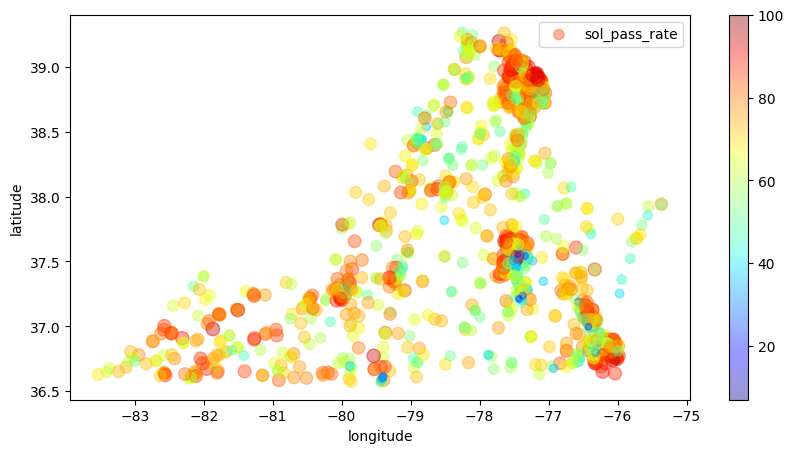

In [12]:
school.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=school["sol_pass_rate"], label="sol_pass_rate", figsize=(10,5),
    c=school["sol_pass_rate"], cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

<ipython-input-13-b892d30e7576>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(["{:2.1f}".format(x) for x in tick_values])


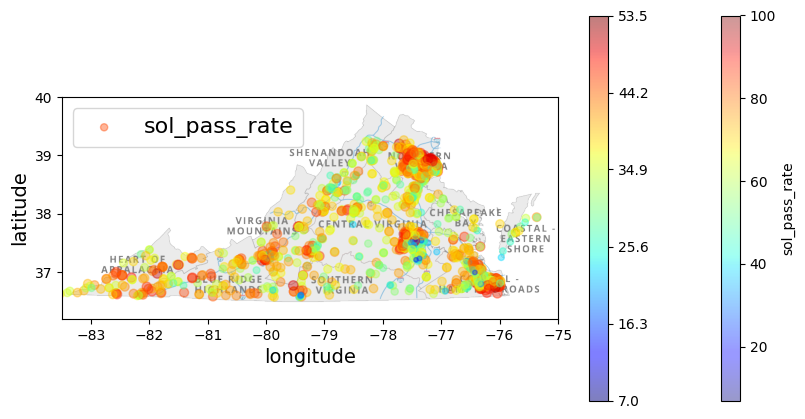

min longitude:  -83.528753
max longitude:  -75.357558
min latitude:  36.568221
max latitude:  39.269494


In [13]:
import matplotlib.image as mpimg
virginia_map = mpimg.imread('virginia.png')
ax = school.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 5),
                 s=school["sol_pass_rate"]*0.5 , label="sol_pass_rate",
                 c="sol_pass_rate", cmap=plt.get_cmap("jet"), colorbar=True, alpha =0.4)

plt.imshow(virginia_map, extent=[-83.5, -75, 36.2, 40], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("latitude", fontsize=14)
plt.xlabel("longitude", fontsize=14)

pass_rate = school["sol_pass_rate"].values
tick_values = np.linspace(pass_rate.min(), pass_rate.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["{:2.1f}".format(x) for x in tick_values])
plt.legend(fontsize=16)
plt.show()

x_low = min (school["longitude"])
x_high = max (school["longitude"])
y_low = min (school["latitude"])
y_high = max (school["latitude"])

print("min longitude: ", x_low)
print("max longitude: ", x_high)
print("min latitude: ", y_low)
print("max latitude: ", y_high)


In [14]:
#Feature engineering
school['students_per_teacher'] = school['half_year_enrollment'] / (school['teacher_BA'] + school['teacher_MA']  + school['teacher_PHD'])
school['highly_qualified_teachers_ratio'] = (school['teacher_MA']  + school['teacher_PHD']) / (school['teacher_BA'] + school['teacher_MA']  + school['teacher_PHD'])
school['federal_funding_ratio'] = school['school_level_expenditures_per_pupil_federal'] / school['total_per_pupil_expenditures']
school['state_funding_ratio'] = school['school_level_expenditures_per_pupil_state'] / school['total_per_pupil_expenditures']
school['absenteeism_rate'] = school['10_or_more_absences'] / school['half_year_enrollment']
school['gender_ratio'] = school['percent_female_students'] / school['percent_male_students']
school.head(20)

,school,division,school_division,latitude,longitude,10_or_more_absences,half_year_enrollment,rate_chronic_absence,free_reduced_lunch_eligible,eoy_avg_daily_membership,...,percent_female_students,percent_male_students,percent_disabled_students,percent_not_disabled_students,students_per_teacher,highly_qualified_teachers_ratio,federal_funding_ratio,state_funding_ratio,absenteeism_rate,gender_ratio
570,George Wythe High,Wythe County Public Schools,George Wythe High Wythe County Public Schools,36.940992,-81.102481,140,432,32.41,51.6,429.24,...,0.439732,0.560268,0.120267,0.879733,4.547368,0.305263,0.008026,0.681676,0.324074,0.784861
874,Lake Ridge Elementary,Prince William County Public Schools,Lake Ridge Elementary Prince William County Pu...,38.696137,-77.312110,105,638,16.46,40.4,683.74,...,0.506550,0.493450,0.133916,0.866084,6.510204,0.612245,0.028105,0.638508,0.164577,1.026549
1100,Norge Elementary,Williamsburg-James City County Public Schools,Norge Elementary Williamsburg-James City Count...,37.364173,-76.770296,16,579,2.76,45.3,621.41,...,0.466974,0.533026,0.201229,0.798771,6.159574,0.670213,0.055819,0.583892,0.027634,0.876081
426,Eastside High,Wise County Public Schools,Eastside High Wise County Public Schools,36.945713,-82.468614,114,373,30.56,52.7,369.64,...,0.486979,0.513021,0.174479,0.825521,3.885417,0.500000,0.013936,0.677023,0.305630,0.949239
861,Kingston Elementary,Virginia Beach City Public Schools,Kingston Elementary Virginia Beach City Public...,36.862473,-76.095282,63,487,12.94,10.0,489.78,...,0.508130,0.491870,0.095528,0.904472,4.870000,0.500000,0.108625,0.891375,0.129363,1.033058
964,Lynnhaven Elementary,Virginia Beach City Public Schools,Lynnhaven Elementary Virginia Beach City Publi...,36.834835,-76.084526,68,318,21.38,65.1,370.74,...,0.484932,0.515068,0.123288,0.876712,3.180000,0.610000,0.174757,0.825243,0.213836,0.941489
948,Louisa County High,Louisa County Public Schools,Louisa County High Louisa County Public Schools,38.017333,-77.921250,170,1621,10.49,39.9,1599.89,...,0.495128,0.504872,0.189403,0.810597,17.430108,0.451613,0.000000,0.744586,0.104874,0.980700
554,Gate City Middle,Scott County Public Schools,Gate City Middle Scott County Public Schools,36.639146,-82.570025,65,315,20.63,55.0,320.05,...,0.477204,0.522796,0.173252,0.826748,3.150000,0.350000,0.078046,0.725831,0.206349,0.912791
1074,Mountain View Elementary,Roanoke County Public Schools,Mountain View Elementary Roanoke County Public...,37.334893,-79.936328,31,305,10.16,44.8,325.39,...,0.453416,0.546584,0.170807,0.829193,3.112245,0.500000,0.115136,0.685091,0.101639,0.829545
816,Johnson-Williams Middle,Clarke County Public Schools,Johnson-Williams Middle Clarke County Public S...,39.151422,-77.987456,100,419,23.87,21.4,417.16,...,0.470024,0.529976,0.117506,0.882494,4.190000,0.730000,0.055577,0.623775,0.238663,0.886878


In [15]:
corr_matrix = school.corr(numeric_only=True)
corr_dict = corr_matrix["sol_pass_rate"].to_dict()
print(corr_dict)


{'latitude': 0.09728296500330756, 'longitude': -0.11103861745919637, '10_or_more_absences': -0.15448532507638774, 'half_year_enrollment': 0.14657379329835452, 'rate_chronic_absence': -0.5289102548986843, 'free_reduced_lunch_eligible': -0.6770136313799406, 'eoy_avg_daily_membership': 0.14027690153391323, 'school_level_expenditures_per_pupil_federal': -0.31460302112359473, 'school_level_expenditures_per_pupil_state': -0.05032773498473093, 'division_level_expenditures_per_pupil_federal': -0.3495240110678344, 'division_level_expenditures_per_pupil_state': -0.12965905514749815, 'total_per_pupil_expenditures': -0.19902703177850134, 'total_expenditures': 0.09664763190696364, 'percent_inexperienced_teachers': -0.15213345688832544, 'percent_out_of_field_teachers': -0.18672675680690645, 'percent_out_of_field_inexperienced_teachers': -0.14240539921487572, 'percent_econ_disadvantaged': -0.6542901696340019, 'teacher_BA': -0.13207372110102264, 'teacher_MA': 0.20157579181828797, 'teacher_PHD': -0.067

In [16]:
school = train_set.drop("sol_pass_rate", axis=1)
school_test = test_set.drop("sol_pass_rate", axis=1)

columns_to_drop = ['school', 'division', 'school_division', 'eoy_avg_daily_membership']

for col in columns_to_drop:
  school = school.drop(col, axis=1)
  school_test = school_test.drop(col, axis=1)
  school_kmeans = school_kmeans.drop(col, axis=1)

school_num = school.select_dtypes(include='number')
school_cat = school.select_dtypes(include='object')

num_attribs = list(school_num)
cat_attribs = list(school_cat)

In [17]:
teacher_BA_ix = school.columns.get_loc('teacher_BA')
teacher_MA_ix = school.columns.get_loc('teacher_MA')
teacher_PHD_ix = school.columns.get_loc('teacher_PHD')
half_year_enrollment_ix = school.columns.get_loc('half_year_enrollment')
school_level_expenditures_per_pupil_federal_ix = school.columns.get_loc('school_level_expenditures_per_pupil_federal')
school_level_expenditures_per_pupil_state_ix = school.columns.get_loc('school_level_expenditures_per_pupil_state')
total_per_pupil_expenditures_ix = school.columns.get_loc('total_per_pupil_expenditures')
percent_female_students_ix = school.columns.get_loc('percent_female_students')
percent_male_students_ix = school.columns.get_loc('percent_male_students')
_10_or_more_absences_ix = school.columns.get_loc('10_or_more_absences')

from sklearn.base import BaseEstimator, TransformerMixin
class SchoolAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        return
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        teacher_total = X[:, teacher_BA_ix] + X[:, teacher_MA_ix] + X[:, teacher_PHD_ix]
        students_per_teacher= X[:, half_year_enrollment_ix] / teacher_total
        highly_qualified_teachers_ratio = (X[:, teacher_MA_ix] + X[:, teacher_PHD_ix]) / teacher_total
        federal_funding_ratio = X[:, school_level_expenditures_per_pupil_federal_ix] / X[:,total_per_pupil_expenditures_ix]
        state_funding_ratio = X[:,school_level_expenditures_per_pupil_state_ix] / X[:,total_per_pupil_expenditures_ix]
        absenteeism_rate = X[:, _10_or_more_absences_ix] / X[:,half_year_enrollment_ix]
        gender_ratio = X[:,percent_female_students_ix] / X[:,percent_male_students_ix]
        print("teacher_total", teacher_total)
        print("students_per_teacher", students_per_teacher)
        print("highly_qualified_teachers_ratio", highly_qualified_teachers_ratio)
        print("federal_funding_ratio", federal_funding_ratio)
        print("state_funding_ratio", state_funding_ratio)
        print("absenteeism_rate", absenteeism_rate)
        print("gender_ratio", gender_ratio)
        return np.c_[X, teacher_total, students_per_teacher, highly_qualified_teachers_ratio, federal_funding_ratio, state_funding_ratio, absenteeism_rate, gender_ratio]

In [18]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', SchoolAttributesAdder()),
        ('std_scaler', StandardScaler()), #StandardScaler should scale the features as described above
    ])

cat_pipeline = Pipeline([
        ('imputer2', SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(sparse_output=False,  handle_unknown="ignore")),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

X_train = full_pipeline.fit_transform(school);
print(school.shape)
print(X_train.shape)
y_train = train_set["sol_pass_rate"].copy().to_numpy()

X_test = full_pipeline.transform(school_test);
print(school_test.shape)
print(X_test.shape)
y_test = test_set["sol_pass_rate"].copy().to_numpy()

kmeans_train = full_pipeline.fit_transform(school_kmeans);
print(school_kmeans.shape)
print(kmeans_train.shape)

teacher_total [ 6.03973214 12.50655022  5.76697389 ...  4.71863857  8.08606811
 28.37679325]
students_per_teacher [ 71.5263508   51.01326816 100.3992755  ... 127.367246    80.87985297
   8.17569476]
highly_qualified_teachers_ratio [1.         1.         1.         ... 1.         0.8763305  0.78855962]
federal_funding_ratio [0.00802568 0.02810545 0.0558194  ... 0.02560216 0.01167793 0.0727481 ]
state_funding_ratio [0.6816761  0.63850843 0.58389174 ... 0.59553085 0.87261832 0.49520263]
absenteeism_rate [0.32407407 0.1645768  0.02763385 ... 0.1031614  0.12385321 0.19396552]
gender_ratio [0.13670886 0.15462185 0.25192308 ... 0.1575985  0.09863946 0.12857143]
(1368, 26)
(1368, 36)
teacher_total [ 6.75414847  3.66271511  4.8740634  10.40367893  0.5010846   9.96961326
  6.1         6.096337    9.20704225  5.90368809  9.12050209  0.43459916
 14.79181818  0.47619048 11.99233983  2.4546875   0.4567474   0.47342193
  3.08353659 12.96938776  8.76013667  3.19399399 20.79883991  6.7619883
 11.606514

In [19]:
# Linear regressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(y_test, y_pred)
print("lin_rmse", lin_rmse)
print("lin_mse", lin_mse)
print("lin_mae", lin_mae)

# now with cross validation (10-fold)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
print("lin_rmse_scores_cv", lin_rmse_scores)
print ("")
print ("--------------------------")
print("lin_rmse_scores_cv_average", lin_rmse_scores.mean())

lin_rmse 9.699931761409017
lin_mse 94.08867617599145
lin_mae 7.245538008584314
lin_rmse_scores_cv [ 9.22633475  9.96411373  8.94055708  9.61612895 10.88703585  9.31572903
  8.67724565  8.95771635  8.83778177  9.46133474]

--------------------------
lin_rmse_scores_cv_average 9.38839778826421


In [20]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_mae = mean_absolute_error(y_test, y_pred)
print("tree_mse", tree_mse)
print("tree_mae", tree_mae)
print("tree_rmse", tree_rmse)
print ("")

# now doing this with cross validation
scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print("tree_rmse_scores_cv", tree_rmse_scores)
print ("")
print ("--------------------------")
print("tree_rmse_scores_cv_average", tree_rmse_scores.mean())


tree_mse 125.25136864264594
tree_mae 8.282507288658891
tree_rmse 11.19157578907662

tree_rmse_scores_cv [12.46235735 13.86949777 13.98623947 10.25583726 12.50030786 12.08909109
 13.0372089  10.91907349 13.65227774 11.90567984]

--------------------------
tree_rmse_scores_cv_average 12.467757076908766


In [21]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_mae = mean_absolute_error(y_test, y_pred)
print("forest_mse", forest_mse)
print("forest_mae", forest_mae)
print("forest_rmse", forest_rmse)
print ("")

# now with cross validation
scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
print("forest_rmse_scores_cv", forest_rmse_scores)
print ("")
print ("--------------------------")
print("forest_rmse_scores_cv_average", forest_rmse_scores.mean())

forest_mse 64.54778376881035
forest_mae 6.0146010689941685
forest_rmse 8.034163538839021

forest_rmse_scores_cv [8.35748511 9.44545281 8.79153161 8.65940135 9.99006599 8.4971327
 9.49367115 7.8836735  8.46651094 8.17916737]

--------------------------
forest_rmse_scores_cv_average 8.776409252569731


In [22]:
# Fine Tuning Random Forest Regressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30, 40], 'max_features': [2, 4, 6, 8, 16, 24, 32]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4, 6, 8, 24, 32]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)



{'max_features': 32, 'n_estimators': 40}
RandomForestRegressor(max_features=32, n_estimators=40)


In [23]:
text = "Initial Analysis:\n Linear Regressor RMSE = 9.523 \n Decision Tree Regressor RMSE = 12.283 \n Random Forest Tree Regressor RMSE = 8.28"
print(text)

Initial Analysis:
 Linear Regressor RMSE = 9.523 
 Decision Tree Regressor RMSE = 12.283 
 Random Forest Tree Regressor RMSE = 8.28


# K-means Clustering

In [24]:
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

school = loadSchoolData()
school_kmeans = school.copy()

In [25]:
columns_to_drop = ['school', 'division', 'school_division', 'eoy_avg_daily_membership']

for col in columns_to_drop:
  school_kmeans = school_kmeans.drop(col, axis=1)

school_num = school_kmeans.select_dtypes(include='number')
school_cat = school_kmeans.select_dtypes(include='object')

num_attribs = list(school_num)
cat_attribs = list(school_cat)

In [26]:
teacher_BA_ix = school_kmeans.columns.get_loc('teacher_BA')
teacher_MA_ix = school_kmeans.columns.get_loc('teacher_MA')
teacher_PHD_ix = school_kmeans.columns.get_loc('teacher_PHD')
half_year_enrollment_ix = school_kmeans.columns.get_loc('half_year_enrollment')
school_level_expenditures_per_pupil_federal_ix = school_kmeans.columns.get_loc('school_level_expenditures_per_pupil_federal')
school_level_expenditures_per_pupil_state_ix = school_kmeans.columns.get_loc('school_level_expenditures_per_pupil_state')
total_per_pupil_expenditures_ix = school_kmeans.columns.get_loc('total_per_pupil_expenditures')
percent_female_students_ix = school_kmeans.columns.get_loc('percent_female_students')
percent_male_students_ix = school_kmeans.columns.get_loc('percent_male_students')
_10_or_more_absences_ix = school_kmeans.columns.get_loc('10_or_more_absences')

from sklearn.base import BaseEstimator, TransformerMixin
class SchoolAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        return
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        teacher_total = X[:, teacher_BA_ix] + X[:, teacher_MA_ix] + X[:, teacher_PHD_ix]
        students_per_teacher= X[:, half_year_enrollment_ix] / teacher_total
        highly_qualified_teachers_ratio = (X[:, teacher_MA_ix] + X[:, teacher_PHD_ix]) / teacher_total
        federal_funding_ratio = X[:, school_level_expenditures_per_pupil_federal_ix] / X[:,total_per_pupil_expenditures_ix]
        state_funding_ratio = X[:,school_level_expenditures_per_pupil_state_ix] / X[:,total_per_pupil_expenditures_ix]
        absenteeism_rate = X[:, _10_or_more_absences_ix] / X[:,half_year_enrollment_ix]
        gender_ratio = X[:,percent_female_students_ix] / X[:,percent_male_students_ix]
        return np.c_[X, teacher_total, students_per_teacher, highly_qualified_teachers_ratio, federal_funding_ratio, state_funding_ratio, absenteeism_rate, gender_ratio]

In [27]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', SchoolAttributesAdder()),
        ('std_scaler', StandardScaler()), #StandardScaler should scale the features as described above
    ])

cat_pipeline = Pipeline([
        ('imputer2', SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(sparse_output=False,  handle_unknown="ignore")),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

kmeans_train = full_pipeline.fit_transform(school_kmeans);
print(school_kmeans.shape)
print(kmeans_train.shape)

(1711, 27)
(1711, 37)


In [30]:
corr_matrix = school_kmeans.corr(numeric_only=True)
print(corr_matrix["sol_pass_rate"].sort_values(ascending=False))
corr_dict = corr_matrix["sol_pass_rate"].to_dict()
print(corr_dict)

sol_pass_rate                                    1.000000
teacher_MA                                       0.200615
half_year_enrollment                             0.155928
total_expenditures                               0.105279
percent_not_disabled_students                    0.085520
latitude                                         0.079308
percent_female_students                          0.021938
percent_male_students                           -0.021938
school_level_expenditures_per_pupil_state       -0.059087
teacher_PHD                                     -0.071703
percent_disabled_students                       -0.079379
longitude                                       -0.103415
teacher_BA                                      -0.129824
division_level_expenditures_per_pupil_state     -0.131287
percent_inexperienced_teachers                  -0.138296
percent_out_of_field_inexperienced_teachers     -0.142779
10_or_more_absences                             -0.150630
percent_out_of

Text(0, 0.5, 'Inertia')

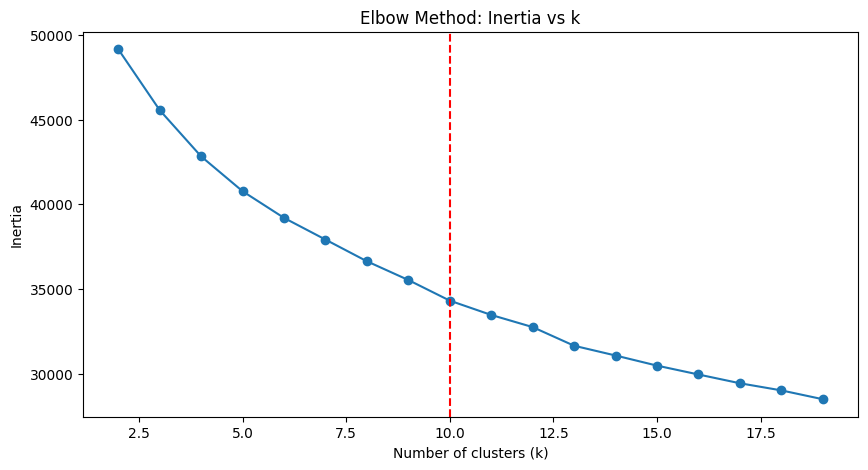

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_values = range(2, 20)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(kmeans_train)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method: Inertia vs k")
plt.axvline(x=10, color='red', linestyle='--', label='Elbow at k=10')

plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")

# as per the elbow plot we will go with 10 clusters

## Creation of Rating System

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(kmeans_train)
labels = kmeans.labels_

centroids = kmeans.cluster_centers_
get_values = list(corr_dict.values())

all_dot_products = []

for i in range(len(centroids)):
    dot_sum = 0
    for j in range(len(get_values)):
        dot_sum += centroids[i][j] * get_values[j]
    all_dot_products.append(dot_sum)

print("all_dot_products:", all_dot_products)

sorted_dots = sorted(all_dot_products)
print(sorted_dots)
rating_for_cluster = []
for dot in all_dot_products:
    rating_for_cluster.append(sorted_dots.index(dot) + 1)

print("rating_for_cluster:", rating_for_cluster)

y_rating = pd.DataFrame(labels, columns=['k_means_class'])
y_rating['rating'] = y_rating['k_means_class'].map(lambda x: rating_for_cluster[x])
y_rating.head(20)
y_rating = y_rating.drop('k_means_class', axis=1)

all_dot_products: [np.float64(-1.187248422012486), np.float64(2.4194109429397437), np.float64(-1.6733885090740839), np.float64(-5.452648540623626), np.float64(-1.923942352683292), np.float64(-0.6345307969501035), np.float64(-8.135299855176882), np.float64(0.7769636710370521), np.float64(3.971757232559078), np.float64(1.230720719802323)]
[np.float64(-8.135299855176882), np.float64(-5.452648540623626), np.float64(-1.923942352683292), np.float64(-1.6733885090740839), np.float64(-1.187248422012486), np.float64(-0.6345307969501035), np.float64(0.7769636710370521), np.float64(1.230720719802323), np.float64(2.4194109429397437), np.float64(3.971757232559078)]
rating_for_cluster: [5, 9, 4, 2, 3, 6, 1, 7, 10, 8]


In [33]:
rating_train_set, rating_test_set, rating_y_train, rating_y_test = train_test_split(
    kmeans_train, y_rating, test_size=0.2, random_state=42)

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(rating_train_set, rating_y_train)
y_pred = log_reg.predict(rating_test_set)

# Classification metrics
accuracy = accuracy_score(rating_y_test, y_pred)
print("Accuracy:", accuracy)

recall = recall_score(rating_y_test, y_pred, average='weighted')
print("Recall:", recall)

precision = precision_score(rating_y_test, y_pred, average='weighted')
print("Precision:", precision)

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(rating_y_test, y_pred))

Accuracy: 0.956268221574344
Recall: 0.956268221574344
Precision: 0.9576223170478606

Confusion Matrix:
 [[ 1  0  0  0  0  1  0  0  0  1]
 [ 0 25  0  1  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  0  0  0]
 [ 0  1  0 38  1  0  0  0  0  1]
 [ 0  2  0  2 49  1  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0]
 [ 0  0  0  0  0  1  0 16  0  0]
 [ 0  0  0  0  1  0  0  0 76  0]
 [ 0  0  0  0  0  0  1  0  1 42]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
@anvil.server.callable
def getRatingPredictionForSchool(a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z, aa):
  dataFrame = school_kmeans.copy().iloc[0:0]
  values = [a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z, aa]
  dataFrame.loc[0] = values
  dataFrame.loc[1] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 'Low Poverty', 'Title I',1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  dataFrame.loc[2] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 'Medium Poverty', 'Non-Title I',1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  dataFrame.loc[3] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 'High Poverty', 'Title I',1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  transformed_data = full_pipeline.fit_transform(dataFrame)
  print(dataFrame.shape)
  print(transformed_data.shape)
  return log_reg.predict(transformed_data)[0]

In [36]:
# test_method = getRatingPredictionForSchool(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 'Low Poverty', 'Title I',1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
# print(test_method)

In [37]:
#kmeans_train, y_rating

#print(kmeans_train)
#print(y_rating)

combined_df = pd.concat([school_kmeans, y_rating.reset_index(drop=True)], axis=1)

combined_df.head()

,latitude,longitude,10_or_more_absences,half_year_enrollment,rate_chronic_absence,free_reduced_lunch_eligible,school_level_expenditures_per_pupil_federal,school_level_expenditures_per_pupil_state,division_level_expenditures_per_pupil_federal,division_level_expenditures_per_pupil_state,...,teacher_BA,teacher_MA,teacher_PHD,provisional_percent,sol_pass_rate,percent_female_students,percent_male_students,percent_disabled_students,percent_not_disabled_students,rating
0,38.621549,-77.343909,87,805,10.81,25.8,216.0,7404.0,571.0,3640.0,...,35.0,62.0,2.0,3.8,76.50,0.477157,0.522843,0.120558,0.879442,9
1,38.446930,-78.014278,139,508,27.36,40.5,208.0,9466.0,745.0,2110.0,...,44.0,56.0,0.0,5.8,69.75,0.503690,0.496310,0.169742,0.830258,3
2,37.491286,-77.546349,134,675,19.85,60.9,682.0,6510.0,543.0,4412.0,...,31.0,69.0,0.0,9.1,53.00,0.497191,0.502809,0.141854,0.858146,4
3,38.948154,-78.206384,57,249,22.89,37.3,512.0,8287.0,45.0,2983.0,...,52.0,44.0,0.0,4.0,72.00,0.473881,0.526119,0.055970,0.944030,9
4,37.016542,-76.376249,106,462,22.94,91.1,1540.0,6746.0,446.0,2738.0,...,58.0,32.0,3.0,27.6,51.75,0.505376,0.494624,0.094624,0.905376,2


## Final Cluster Averaging based on Rating

In [38]:
average_rating_cluster = combined_df.groupby('rating').mean(numeric_only=True)
average_rating_cluster

,latitude,longitude,10_or_more_absences,half_year_enrollment,rate_chronic_absence,free_reduced_lunch_eligible,school_level_expenditures_per_pupil_federal,school_level_expenditures_per_pupil_state,division_level_expenditures_per_pupil_federal,division_level_expenditures_per_pupil_state,...,percent_econ_disadvantaged,teacher_BA,teacher_MA,teacher_PHD,provisional_percent,sol_pass_rate,percent_female_students,percent_male_students,percent_disabled_students,percent_not_disabled_students
rating,,,,,,,,,,,,,,,,,,,,,
1,38.431348,-77.170804,45.571429,76.142857,47.610000,53.520000,2806.714286,47315.285714,918.857143,5051.142857,...,0.548201,30.285714,63.571429,3.857143,14.140000,34.247619,0.399030,0.600970,0.202683,0.847988
2,37.245386,-77.328313,156.549296,527.535211,29.258380,92.675887,1197.309859,8822.957746,1665.605634,4881.147887,...,0.620034,42.845070,48.894366,2.584507,13.915603,41.995775,0.487262,0.512738,0.133691,0.868206
3,37.852624,-77.910720,166.319767,646.558140,26.303488,55.235465,648.715116,8165.133721,572.459302,3702.465116,...,0.469765,47.784884,45.325581,0.918605,10.179651,61.152132,0.483702,0.516298,0.138889,0.861111
4,38.077723,-77.639009,116.094340,527.901887,21.842491,67.837262,1057.430189,9652.728302,528.113208,3914.498113,...,0.584688,39.288973,57.376426,0.593156,6.218774,53.047358,0.487538,0.512462,0.121005,0.879456
5,37.005349,-80.610240,79.382222,353.111111,22.188622,72.170089,1359.488889,7839.257778,481.257778,3370.951111,...,0.561571,56.299107,39.714286,0.821429,6.145740,69.616519,0.481998,0.518002,0.156477,0.844939
6,37.870947,-77.719857,91.676471,470.389706,19.886250,50.523704,942.926471,11085.897059,508.735294,4509.375000,...,0.479083,38.588235,57.250000,1.080882,7.958519,65.036397,0.466448,0.533552,0.204584,0.795416
7,38.084901,-77.419746,485.962963,1977.212963,25.998796,39.439815,335.675926,9136.407407,515.833333,4181.638889,...,0.410287,34.055556,60.453704,1.935185,8.450926,69.588117,0.488147,0.511853,0.141489,0.858511
8,36.817790,-76.101254,136.670886,771.354430,17.124430,41.948101,1674.341772,12154.493671,0.000000,0.000000,...,0.449399,44.354430,52.075949,1.151899,5.934177,75.266456,0.484155,0.515845,0.127811,0.872189
9,37.590377,-78.118408,92.848943,644.821752,14.051511,33.191489,466.268882,8188.942598,379.444109,3505.703927,...,0.322584,42.428571,53.899696,0.933131,6.033028,75.582276,0.492563,0.507437,0.119562,0.881162


In [39]:
# Get count of schools per rating (sorted from 1 to 10)
rating_counts = combined_df['rating'].value_counts()

school_counts = []

# Display ratings from 1 to 10
for rating in range(1, 11):
    count = rating_counts.get(rating, 0)
    school_counts.append(count)
    print(f"Rating {rating}: {count} schools")

average_rating_cluster['number_of_schools'] = school_counts
average_rating_cluster.head(10)

Rating 1: 7 schools
Rating 2: 142 schools
Rating 3: 172 schools
Rating 4: 265 schools
Rating 5: 225 schools
Rating 6: 136 schools
Rating 7: 108 schools
Rating 8: 79 schools
Rating 9: 331 schools
Rating 10: 246 schools


,latitude,longitude,10_or_more_absences,half_year_enrollment,rate_chronic_absence,free_reduced_lunch_eligible,school_level_expenditures_per_pupil_federal,school_level_expenditures_per_pupil_state,division_level_expenditures_per_pupil_federal,division_level_expenditures_per_pupil_state,...,teacher_BA,teacher_MA,teacher_PHD,provisional_percent,sol_pass_rate,percent_female_students,percent_male_students,percent_disabled_students,percent_not_disabled_students,number_of_schools
rating,,,,,,,,,,,,,,,,,,,,,
1,38.431348,-77.170804,45.571429,76.142857,47.610000,53.520000,2806.714286,47315.285714,918.857143,5051.142857,...,30.285714,63.571429,3.857143,14.140000,34.247619,0.399030,0.600970,0.202683,0.847988,7
2,37.245386,-77.328313,156.549296,527.535211,29.258380,92.675887,1197.309859,8822.957746,1665.605634,4881.147887,...,42.845070,48.894366,2.584507,13.915603,41.995775,0.487262,0.512738,0.133691,0.868206,142
3,37.852624,-77.910720,166.319767,646.558140,26.303488,55.235465,648.715116,8165.133721,572.459302,3702.465116,...,47.784884,45.325581,0.918605,10.179651,61.152132,0.483702,0.516298,0.138889,0.861111,172
4,38.077723,-77.639009,116.094340,527.901887,21.842491,67.837262,1057.430189,9652.728302,528.113208,3914.498113,...,39.288973,57.376426,0.593156,6.218774,53.047358,0.487538,0.512462,0.121005,0.879456,265
5,37.005349,-80.610240,79.382222,353.111111,22.188622,72.170089,1359.488889,7839.257778,481.257778,3370.951111,...,56.299107,39.714286,0.821429,6.145740,69.616519,0.481998,0.518002,0.156477,0.844939,225
6,37.870947,-77.719857,91.676471,470.389706,19.886250,50.523704,942.926471,11085.897059,508.735294,4509.375000,...,38.588235,57.250000,1.080882,7.958519,65.036397,0.466448,0.533552,0.204584,0.795416,136
7,38.084901,-77.419746,485.962963,1977.212963,25.998796,39.439815,335.675926,9136.407407,515.833333,4181.638889,...,34.055556,60.453704,1.935185,8.450926,69.588117,0.488147,0.511853,0.141489,0.858511,108
8,36.817790,-76.101254,136.670886,771.354430,17.124430,41.948101,1674.341772,12154.493671,0.000000,0.000000,...,44.354430,52.075949,1.151899,5.934177,75.266456,0.484155,0.515845,0.127811,0.872189,79
9,37.590377,-78.118408,92.848943,644.821752,14.051511,33.191489,466.268882,8188.942598,379.444109,3505.703927,...,42.428571,53.899696,0.933131,6.033028,75.582276,0.492563,0.507437,0.119562,0.881162,331


# Data and Trend Analysis of Rating Groups

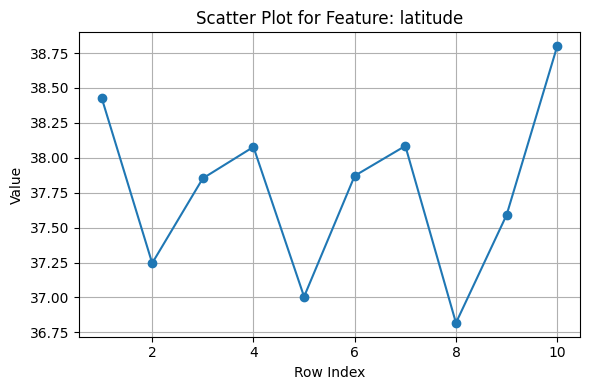

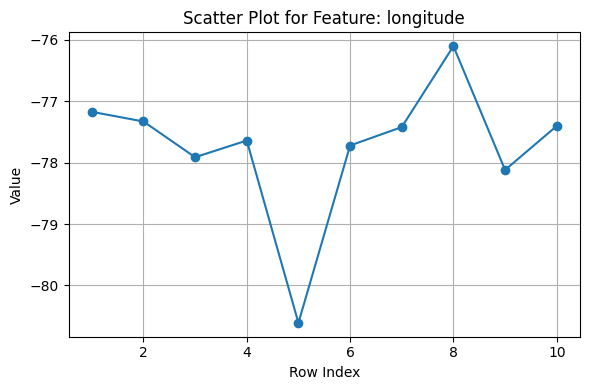

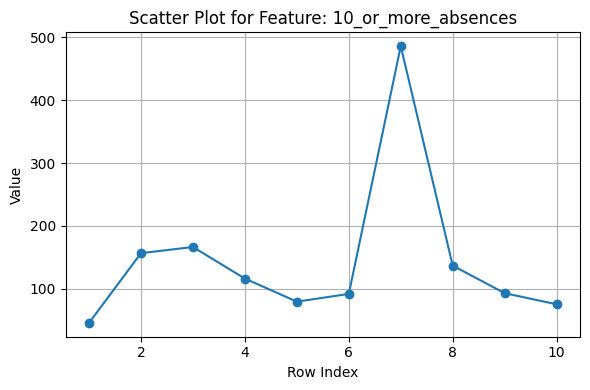

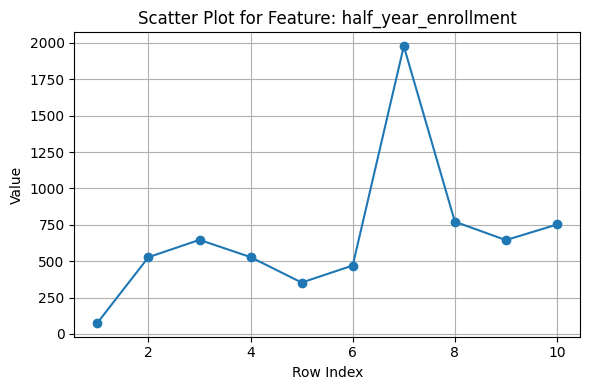

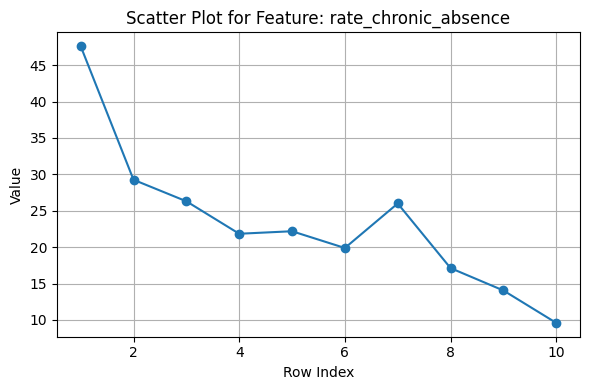

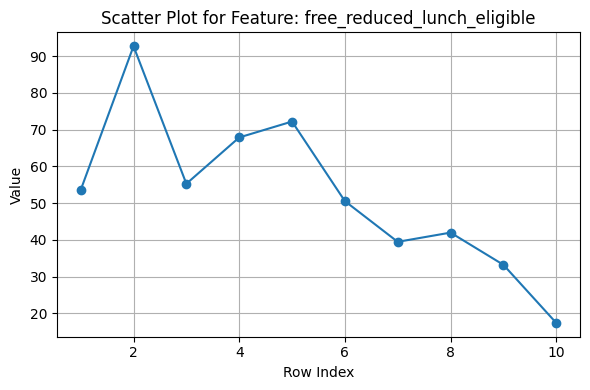

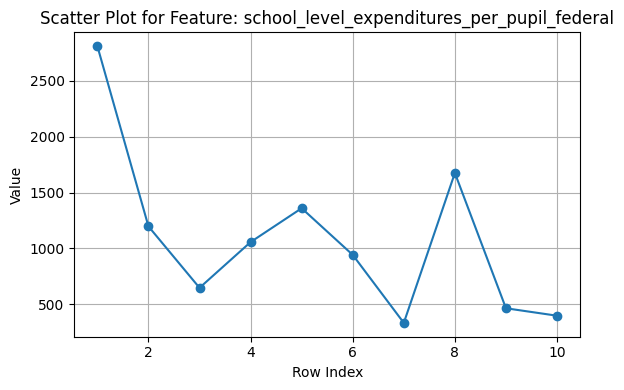

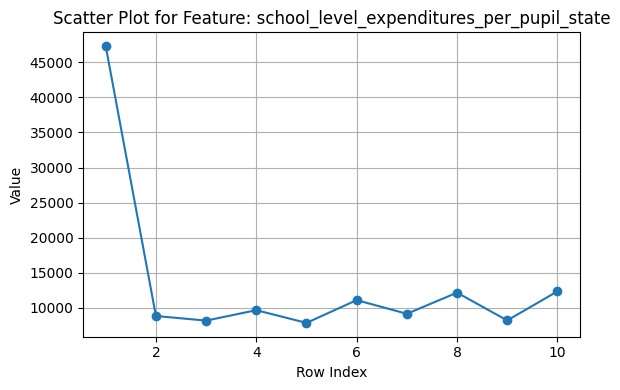

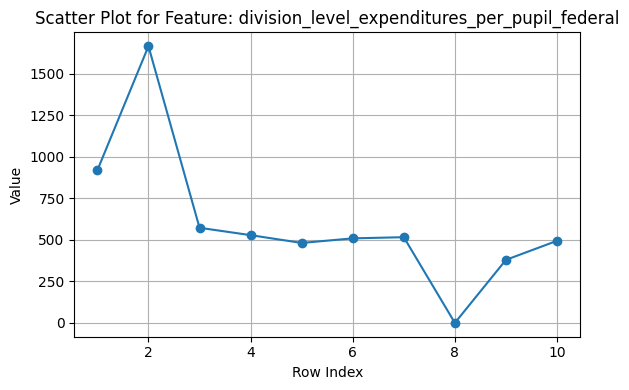

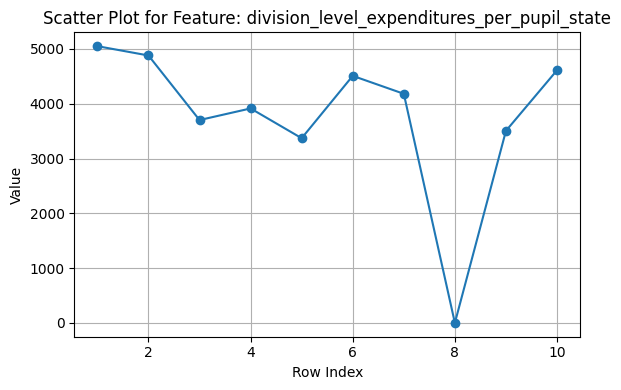

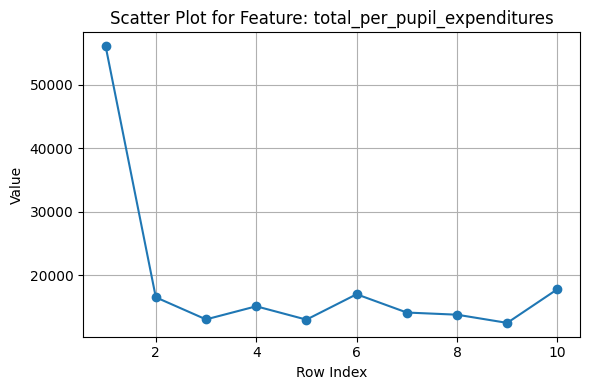

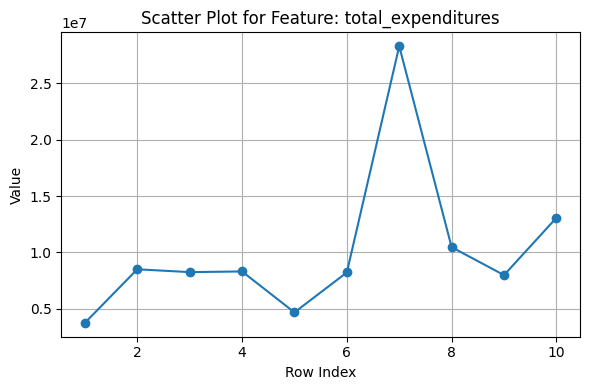

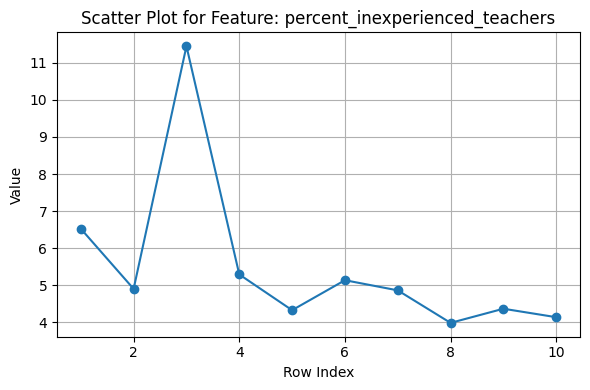

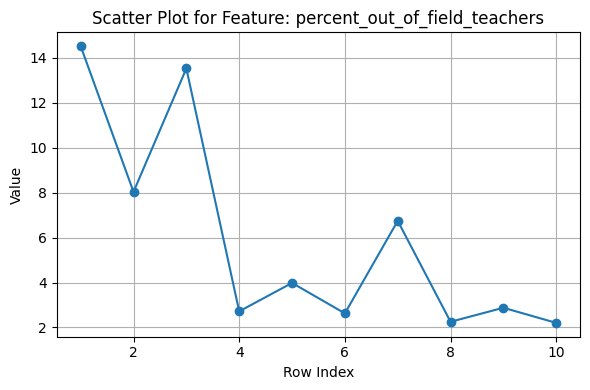

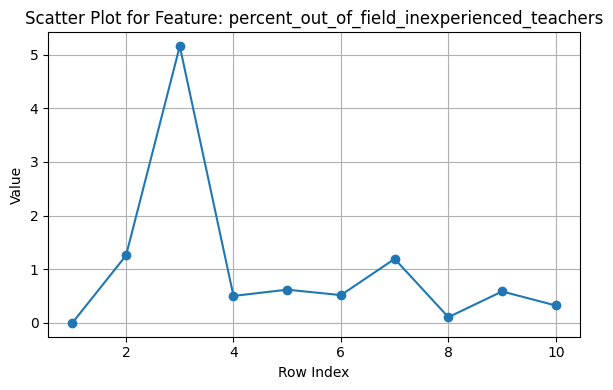

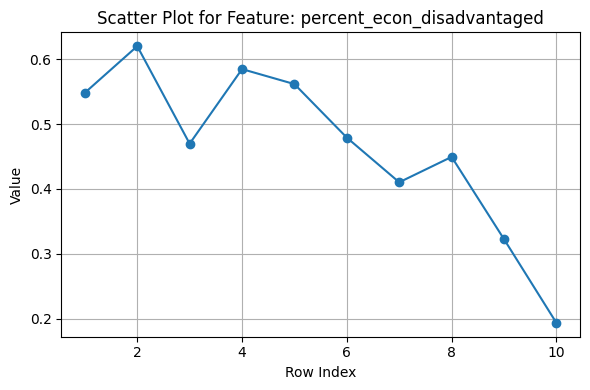

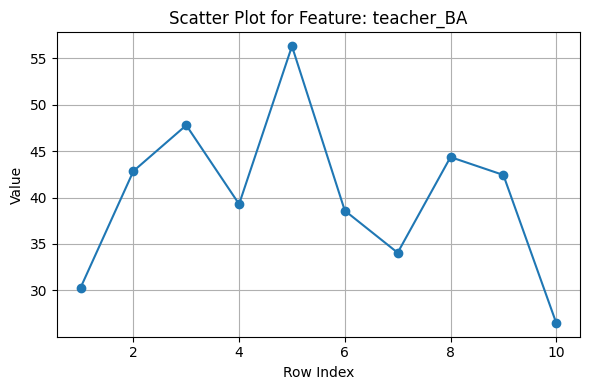

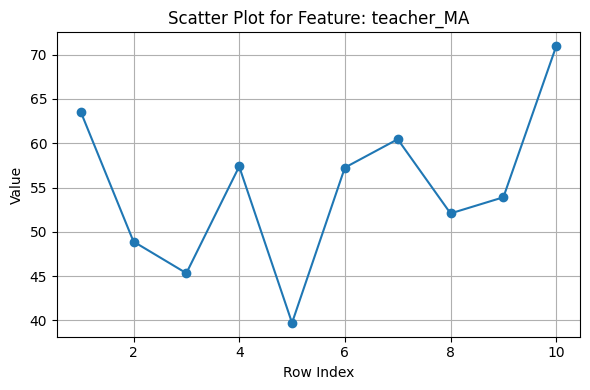

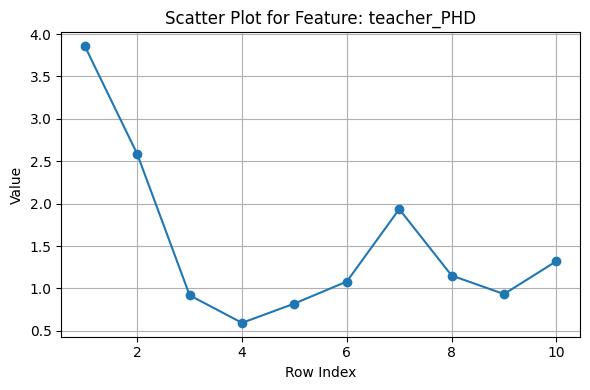

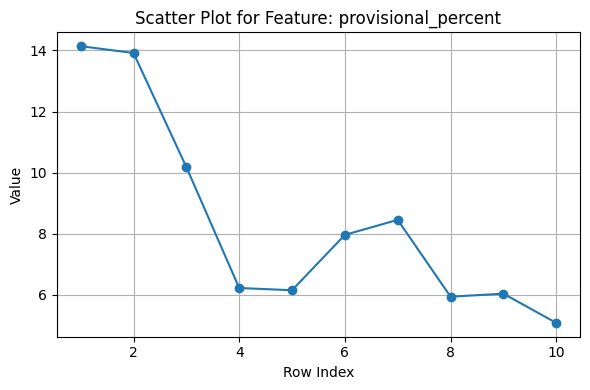

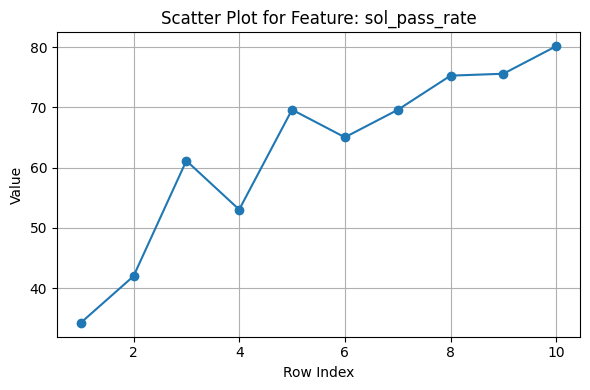

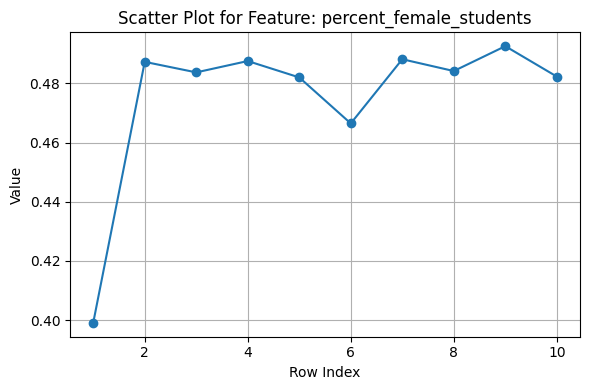

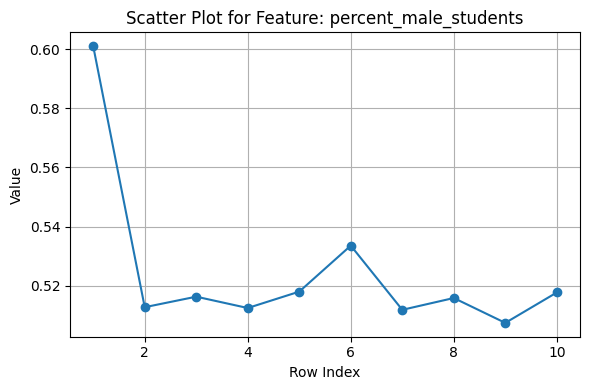

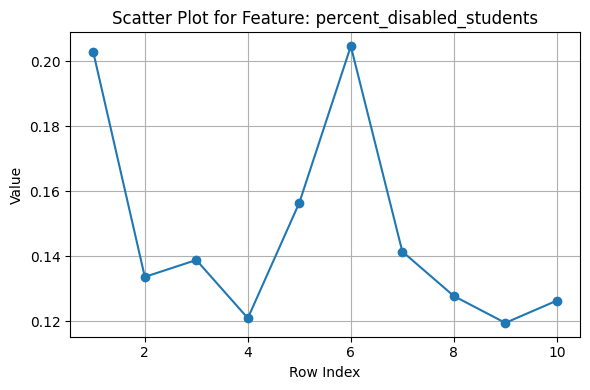

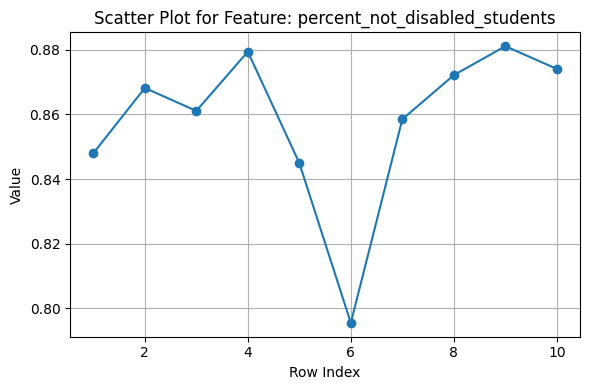

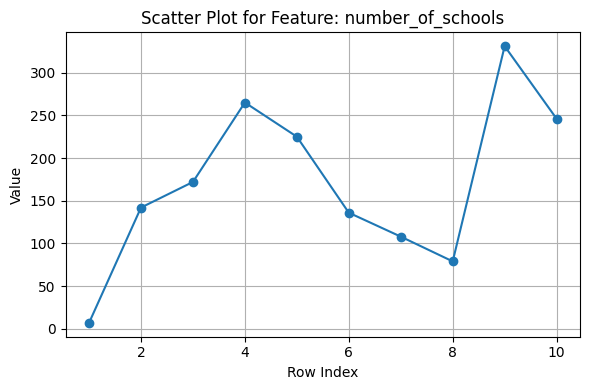

In [40]:
import matplotlib.pyplot as plt

for col in average_rating_cluster.columns:
    plt.figure(figsize=(6, 4))

    plt.plot(average_rating_cluster.index, average_rating_cluster[col], marker='o', linestyle='-')

    plt.title(f'Scatter Plot for Feature: {col}')
    plt.xlabel('Row Index')
    plt.ylabel('Value')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [41]:
average_rating_json = average_rating_cluster.to_json(orient='index')
print(average_rating_json)

{"1":{"latitude":38.4313482857,"longitude":-77.1708035714,"10_or_more_absences":45.5714285714,"half_year_enrollment":76.1428571429,"rate_chronic_absence":47.61,"free_reduced_lunch_eligible":53.52,"school_level_expenditures_per_pupil_federal":2806.7142857143,"school_level_expenditures_per_pupil_state":47315.2857142857,"division_level_expenditures_per_pupil_federal":918.8571428571,"division_level_expenditures_per_pupil_state":5051.1428571429,"total_per_pupil_expenditures":56092.1428571429,"total_expenditures":3748634.1428571427,"percent_inexperienced_teachers":6.525,"percent_out_of_field_teachers":14.525,"percent_out_of_field_inexperienced_teachers":0.0,"percent_econ_disadvantaged":0.5482008826,"teacher_BA":30.2857142857,"teacher_MA":63.5714285714,"teacher_PHD":3.8571428571,"provisional_percent":14.14,"sol_pass_rate":34.2476190486,"percent_female_students":0.399029815,"percent_male_students":0.600970185,"percent_disabled_students":0.2026825633,"percent_not_disabled_students":0.8479880775

# Running the Anvil Code

In [42]:
import json
@anvil.server.callable
def average_rating_json(i):
  # json_1 = average_rating_cluster.loc[i].to_json(orient='index')
  json_records = json.loads(average_rating_cluster.loc[i].to_json(orient='index'))
  return json_records

average_rating_json(10)

{'latitude': 38.7990528089,
 'longitude': -77.401294748,
 '10_or_more_absences': 75.162601626,
 'half_year_enrollment': 752.1138211382,
 'rate_chronic_absence': 9.5991869919,
 'free_reduced_lunch_eligible': 17.3845188285,
 'school_level_expenditures_per_pupil_federal': 399.7224489796,
 'school_level_expenditures_per_pupil_state': 12337.8448979592,
 'division_level_expenditures_per_pupil_federal': 494.0326530612,
 'division_level_expenditures_per_pupil_state': 4611.4204081633,
 'total_per_pupil_expenditures': 17843.0163265306,
 'total_expenditures': 13070382.440816326,
 'percent_inexperienced_teachers': 4.1369747899,
 'percent_out_of_field_teachers': 2.2046218487,
 'percent_out_of_field_inexperienced_teachers': 0.3239495798,
 'percent_econ_disadvantaged': 0.193587336,
 'teacher_BA': 26.5,
 'teacher_MA': 70.9634146341,
 'teacher_PHD': 1.3211382114,
 'provisional_percent': 5.0761506276,
 'sol_pass_rate': 80.1563008129,
 'percent_female_students': 0.4822831841,
 'percent_male_students': 0.

In [43]:
#fine tuning logistic regression

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000, 2000, 3000]
}

log_reg = LogisticRegression()
grid_search_log = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search_log.fit(rating_train_set, rating_y_train.values.ravel())

print("the best parameters are:", grid_search_log.best_params_)
print("the best score is:", grid_search_log.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


the best parameters are: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
the best score is: 0.9517526269351088


Classification Used for Classifying New Schools

In [44]:
#fine tuning SVM
from sklearn.svm import SVC

svm_clf = SVC()
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(svm_clf, svm_param_grid, cv=5, scoring='accuracy')
grid_search_svm.fit(rating_train_set, rating_y_train.values.ravel())

print("the best SVM params are:", grid_search_svm.best_params_)
print("the best SVM score is:", grid_search_svm.best_score_)

svm_best = grid_search_svm.best_estimator_
svm_preds = svm_best.predict(rating_test_set)

print("SVM Accuracy:", accuracy_score(rating_y_test, svm_preds))
print("SVM Recall:", recall_score(rating_y_test, svm_preds, average='weighted'))
print("SVM Precision:", precision_score(rating_y_test, svm_preds, average='weighted', zero_division=0))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


the best SVM params are: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
the best SVM score is: 0.9400550787412103
SVM Accuracy: 0.9212827988338192
SVM Recall: 0.9212827988338192
SVM Precision: 0.9243825761038416


In [45]:
#fine tuning decision tree classifier

from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search_tree = GridSearchCV(tree_clf, tree_param_grid, cv=5, scoring='accuracy')
grid_search_tree.fit(rating_train_set, rating_y_train.values.ravel())

print("the best tree params are:", grid_search_tree.best_params_)
print("the best tree score is:", grid_search_tree.best_score_)

tree_best = grid_search_tree.best_estimator_
tree_preds = tree_best.predict(rating_test_set)

print("Tree Accuracy:", accuracy_score(rating_y_test, tree_preds))
print("Tree Recall:", recall_score(rating_y_test, tree_preds, average='weighted'))
print("Tree Precision:", precision_score(rating_y_test, tree_preds, average='weighted', zero_division=0))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


the best tree params are: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2}
the best tree score is: 0.7273361674821529
Tree Accuracy: 0.7201166180758017
Tree Recall: 0.7201166180758017
Tree Precision: 0.7319219432117602


In [46]:
# gradient boost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(rating_train_set, rating_y_train.values.ravel())
gb_preds = gb_clf.predict(rating_test_set)
gb_accuracy = accuracy_score(rating_y_test, gb_preds)
gb_precision = precision_score(rating_y_test, gb_preds, average='weighted', zero_division=0)
gb_recall = recall_score(rating_y_test, gb_preds, average='weighted')

print("Gradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting Precision:", gb_precision)
print("Gradient Boosting Recall:", gb_recall)


Gradient Boosting Accuracy: 0.8688046647230321
Gradient Boosting Precision: 0.8778969714259948
Gradient Boosting Recall: 0.8688046647230321


In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

gb_clf = GradientBoostingClassifier(random_state=42)

gb_param_dist = {
    'n_estimators': randint(50, 120),
    'learning_rate': uniform(0.05, 0.15),
    'max_depth': randint(3, 5),
    'subsample': uniform(0.85, 0.15)
}

random_search_gb = RandomizedSearchCV(
    gb_clf, gb_param_dist, n_iter=12, cv=3,
    scoring='accuracy', n_jobs=-1, random_state=42
)

random_search_gb.fit(rating_train_set, rating_y_train.values.ravel())

print("Best GB Params:", random_search_gb.best_params_)
print("Best GB Score:", random_search_gb.best_score_)

Best GB Params: {'learning_rate': np.float64(0.11841049763255539), 'max_depth': 3, 'n_estimators': 111, 'subsample': np.float64(0.8799510673237539)}
Best GB Score: 0.875


In [48]:
anvil.server.wait_forever()
#To interact with UI, run this cell and go to: https://bountiful-starchy-sand.anvil.app/

KeyboardInterrupt: 